Sorting through BH optimization results
--

Pick the best performing result out of 10 initialization conditions for all 7 canonical networks.

In [25]:
%%capture --no-display
import warnings
warnings.filterwarnings('ignore')

import os
import h5py
import numpy as np
import pandas as pd
#import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import pearsonr

# spectrome imports
from spectrome.brain import Brain
from spectrome.utils import functions, path
from spectrome.forward import eigenmode, laplacian

Default Network results:

In [19]:
colnames = ['Fun','x']
indnames = [0,1,2,3,4,5,6,7,8,9]
nruns = 10
default_dice = pd.DataFrame(columns = colnames, index = indnames)
data_dir = '/Users/xxie/lab/complex_laplacian/data/dice_scores'
for i in np.arange(0,nruns):
    #h5_path = path.get_file_path('laplacian_networks/Default{}_BH_corr.h5'.format(i))
    h5_path = os.path.join(data_dir,'Default{}_BH_DICE.h5'.format(i))
    bh_default = path.read_hdf5(h5_path)
    default_dice.at[i,'Fun'] = bh_default['fun']
    default_dice.at[i,'x'] = np.round(bh_default['x'],3)
    
default_dice.style.apply(functions.highlight_min, subset=pd.IndexSlice[:,'Fun'])

,Fun,x
0,0.684000,[ 4.143 23.499]
1,0.684000,[ 2.392 124.168]
2,0.730000,[ 3.557 59.835]
3,0.692000,[ 0.8 200. ]
4,0.737000,[ 3.884 417.471]
5,0.684000,[ 3.347 23.246]
6,0.700000,[ 3.416 248.726]
7,0.730000,[ 1.65 161.106]
8,0.692000,[ 2. 300.]
9,0.737000,[ 3.52 509.349]


In [10]:
bh_default

{'lowest_optimization_result': {'hess_inv': array([[1, 0],
         [0, 1]]),
  'jac': array([0., 0.]),
  'x': array([  3.520478  , 509.34869478]),
  'fun': 0.737,
  'message': 'Optimization terminated successfully.',
  'nfev': 3,
  'nit': 0,
  'njev': 1,
  'status': 0,
  'success': True},
 'message': ['success condition satisfied'],
 'x': array([  3.520478  , 509.34869478]),
 'fun': 0.737,
 'minimization_failures': 0,
 'nfev': 381,
 'nit': 126,
 'njev': 127}

Dorsal Attention:

In [9]:
dorsal_corrs = pd.DataFrame(columns = colnames, index = indnames)

for i in np.arange(0,nruns):
    h5_path = os.path.join(data_dir, 'Dorsal_Attention{}_BH_DICE.h5'.format(i))
    bh_dorsal = path.read_hdf5(h5_path)
    dorsal_corrs.at[i,'Fun'] = -bh_dorsal['fun']
    dorsal_corrs.at[i,'x'] = np.round(bh_dorsal['x'],3)

dorsal_corrs.style.apply(functions.highlight_max, subset=pd.IndexSlice[:,'Fun'])

,Fun,x
0,-0.517000,[ 3.64 12.203]
1,-0.600000,[ 3.24 102.651]
2,-0.571000,[ 1.639 56.768]
3,-0.630000,[ 2.094 201.602]
4,-0.630000,[ 2.42 412.712]
5,-0.517000,[ 0.562 23.061]
6,-0.704000,[ 3.88 249.444]
7,-0.655000,[ 2.626 151.575]
8,-0.714000,[ 1.272 309.143]
9,-0.600000,[ 2.885 520.053]


Frontoparietal:

In [12]:
front_dice = pd.DataFrame(columns = colnames, index = indnames)

for i in np.arange(0,nruns):
    h5_path = os.path.join(data_dir, 'Frontoparietal{}_BH_DICE.h5'.format(i))
    bh_front = path.read_hdf5(h5_path)
    front_dice.at[i,'Fun'] = -bh_front['fun']
    front_dice.at[i,'x'] = np.round(bh_front['x'],3)

front_dice.style.apply(functions.highlight_max, subset=pd.IndexSlice[:,'Fun'])

,Fun,x
0,-0.611000,[2.34 5.798]
1,-0.667000,[ 1.233 108.06 ]
2,-0.622000,[ 3.491 68.818]
3,-0.706000,[ 2.64 200.798]
4,-0.657000,[ 4.415 405.209]
5,-0.657000,[ 4.45 20.181]
6,-0.657000,[ 3.199 257.943]
7,-0.657000,[ 4.507 153.15 ]
8,-0.657000,[ 3.84 300.798]
9,-0.667000,[ 4.915 505.209]


Limbic:

In [13]:
 limbic_corrs = pd.DataFrame(columns = colnames, index = indnames)

for i in np.arange(0,nruns):
    #h5_path = path.get_file_path('laplacian_networks/Limbic{}_BH_corr.h5'.format(i))
    h5_path = os.path.join(data_dir, 'Limbic{}_BH_DICE.h5'.format(i))
    bh_limbic = path.read_hdf5(h5_path)
    limbic_corrs.at[i,'Fun'] = -bh_limbic['fun']
    limbic_corrs.at[i,'x'] = np.round(bh_limbic['x'],3)

limbic_corrs.style.apply(functions.highlight_max, subset=pd.IndexSlice[:,'Fun']) # in case of a draw, take lowest reconstruction error

,Fun,x
0,-0.571000,[0.5 5. ]
1,-0.692000,[ 1. 100.]
2,-0.692000,[ 3.042 48.79 ]
3,-0.760000,[ 0.8 200. ]
4,-0.692000,[ 1.22 400.242]
5,-0.571000,[ 3. 15.]
6,-0.692000,[ 4.52 254.687]
7,-0.692000,[ 4.242 148.79 ]
8,-0.692000,[ 2. 300.]
9,-0.692000,[ 1. 500.]


Somatomotor:

In [14]:
 motor_corrs = pd.DataFrame(columns = colnames, index = indnames)

for i in np.arange(0,nruns):
    h5_path = os.path.join(data_dir, 'Somatomotor{}_BH_DICE.h5'.format(i))
    bh_motor = path.read_hdf5(h5_path)
    motor_corrs.at[i,'Fun'] = -bh_motor['fun']
    motor_corrs.at[i,'x'] = np.round(bh_motor['x'],3)

motor_corrs.style.apply(functions.highlight_max, subset=pd.IndexSlice[:,'Fun']) # in case of a draw, take lowest reconstruction error

,Fun,x
0,-0.571000,[ 4.91 11.535]
1,-0.655000,[ 1. 100.]
2,-0.571000,[ 1.731 60.445]
3,-0.692000,[ 3.321 201.607]
4,-0.571000,[ 0.5 400. ]
5,-0.600000,[ 3.256 14.524]
6,-0.692000,[ 2.374 260.514]
7,-0.630000,[ 4.017 161.481]
8,-0.643000,[ 1.11 308.209]
9,-0.692000,[ 1. 500.]


Ventral Attention:

In [15]:
 ventral_corrs = pd.DataFrame(columns = colnames, index = indnames)

for i in np.arange(0,nruns):
    #h5_path = path.get_file_path('laplacian_networks/v1_3parameters/Ventral_Attention{}_BH_corr.h5'.format(i))
    h5_path = os.path.join(data_dir, 'Ventral_Attention{}_BH_DICE.h5'.format(i))
    bh_ventral = path.read_hdf5(h5_path)
    ventral_corrs.at[i,'Fun'] = -bh_ventral['fun']
    ventral_corrs.at[i,'x'] = np.round(bh_ventral['x'],3)

ventral_corrs.style.apply(functions.highlight_max, subset=pd.IndexSlice[:,'Fun']) # in case of a draw, take lowest reconstruction error

,Fun,x
0,-0.625000,[0.5 5. ]
1,-0.613000,[ 3.76 119.938]
2,-0.636000,[ 2.586 60.667]
3,-0.667000,[ 0.8 200. ]
4,-0.600000,[ 0.5 400. ]
5,-0.677000,[ 4.759 19.37 ]
6,-0.667000,[ 4.464 255.916]
7,-0.600000,[ 0.373 162.046]
8,-0.562000,[ 1.272 309.143]
9,-0.600000,[ 2.464 503.176]


Visual:

In [16]:
 visual_corrs = pd.DataFrame(columns = colnames, index = indnames)

for i in np.arange(0,nruns):
    h5_path = os.path.join(data_dir, 'Visual{}_BH_DICE.h5'.format(i))
    bh_visual = path.read_hdf5(h5_path)
    visual_corrs.at[i,'Fun'] = -bh_visual['fun']
    visual_corrs.at[i,'x'] = np.round(bh_visual['x'],3)

visual_corrs.style.apply(functions.highlight_max, subset=pd.IndexSlice[:,'Fun']) # in case of a draw, take lowest reconstruction error

,Fun,x
0,-0.333000,[3.084 8.732]
1,-0.667000,[ 4.162 122.496]
2,-0.481000,[ 1.857 63.165]
3,-0.538000,[ 2.784 222.723]
4,-0.667000,[ 2.34 400.798]
5,-0.379000,[ 3. 15.]
6,-0.538000,[ 4.196 280.96 ]
7,-0.600000,[ 2. 150.]
8,-0.538000,[ 2. 300.]
9,-0.600000,[ 4.346 504.75 ]


In [17]:
import seaborn as sns
sns.set_theme(color_codes=True)

In [18]:
## Set-up, load, and house-keeping:
data_dir = "../data"

# Load Pablo's Yeo 2017 canonical network maps
# fc_dk = np.load("../data/com_dk.npy", allow_pickle=True).item()
fc_dk_normalized = pd.read_csv("../data/DK_dictionary_normalized.csv").set_index(
    "Unnamed: 0"
)

# define list of canonical network names and re-order the dictionary using these names:
fc_names = [
    "Limbic",
    "Default",
    "Visual",
    "Fronto \n parietal",
    "Somato \n motor",
    "Dorsal \n Attention",
    "Ventral \n Attention",
]

fc_dk_normalized = fc_dk_normalized.reindex(
    [
        "Limbic",
        "Default",
        "Visual",
        "Frontoparietal",
        "Somatomotor",
        "Dorsal_Attention",
        "Ventral_Attention",
    ]
).fillna(0)

opt_param = np.zeros([len(fc_names), 2])

In [21]:
## Load the optimized parameters first
h5_path = os.path.join(data_dir, "Default0_BH_DICE.h5")
bh_default = path.read_hdf5(h5_path)
opt_param[1, :] = bh_default["x"]
# print('Default network parameters:' + str(np.round(bh_default['x'],2)))

h5_path = os.path.join(data_dir, "Dorsal_Attention0_BH_DICE.h5")
bh_dorsal = path.read_hdf5(h5_path)
opt_param[5, :] = bh_dorsal["x"]
# print('Doral Attention network parameters:' + str(np.round(bh_dorsal['x'],2)))

h5_path = os.path.join(data_dir, "Frontoparietal0_BH_DICE.h5")
bh_front = path.read_hdf5(h5_path)
opt_param[3, :] = bh_front["x"]
# print('Frontoparietal network parameters:' + str(np.round(bh_front['x'],2)))

h5_path = os.path.join(data_dir, "Limbic0_BH_DICE.h5")
bh_limbic = path.read_hdf5(h5_path)
opt_param[0, :] = bh_limbic["x"]
# print('Limbic network parameters:' + str(np.round(bh_limbic['x'],2)))

h5_path = os.path.join(data_dir, "Somatomotor0_BH_DICE.h5")
bh_motor = path.read_hdf5(h5_path)
opt_param[4, :] = bh_motor["x"]
# print('Somatomotor network parameters:' + str(np.round(bh_motor['x'],2)))

h5_path = os.path.join(data_dir, "Ventral_Attention8_BH_DICE.h5")
bh_ventral = path.read_hdf5(h5_path)
opt_param[6, :] = bh_ventral["x"]
# print('Ventral Attention network parameters:' + str(np.round(bh_ventral['x'],2)))

h5_path = os.path.join(data_dir, "Visual0_BH_DICE.h5")
bh_visual = path.read_hdf5(h5_path)
opt_param[2, :] = bh_visual["x"]
# print('Visual network parameters:' + str(np.round(bh_visual['x'],2)))

# pile these parameters:
parameters = pd.DataFrame(
    data=opt_param, index=fc_dk_normalized.index, columns=["alpha", "wave_number"]
)
print(parameters)

                      alpha  wave_number
Unnamed: 0                              
Limbic             0.500000     5.000000
Default            4.142515    23.499162
Visual             3.083883     8.731779
Frontoparietal     2.340069     5.798048
Somatomotor        4.909721    11.534925
Dorsal_Attention   3.640182    12.202982
Ventral_Attention  1.271674   309.142646


In [23]:
# Define the limbic network, remove the NaNs:
limbic_network = np.nan_to_num(fc_dk_normalized.loc["Limbic"].values)

# create brain object
brain = Brain.Brain()
brain.add_connectome('../data')
brain.reorder_connectome(brain.connectome, brain.distance_matrix)
brain.bi_symmetric_c()
brain.reduce_extreme_dir()

(86, 86)


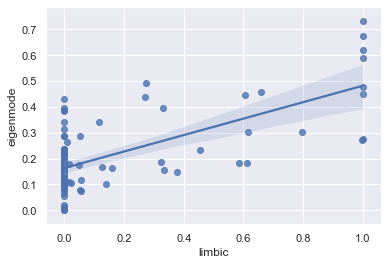

In [26]:
N = 10

# complex Laplacian eigenmodes:
brain.decompose_complex_laplacian(
    alpha=parameters.loc["Limbic", "alpha"],
    k=parameters.loc["Limbic", "wave_number"],
    vis=False,
)
print(brain.norm_eigenmodes.shape)

# compute the spatial correlations:
corrs = np.squeeze(np.zeros([len(brain.norm_eigenmodes), 1]))
for e in np.arange(0, len(corrs)):
    corrs[e] = pearsonr(np.squeeze(limbic_network), brain.norm_eigenmodes[:, e])[0]

# sort the eigenmodes:
ordered_eigenmodes = np.argsort(-np.round(corrs, 3))

# 
selected_eigs = brain.norm_eigenmodes[:, ordered_eigenmodes[0 : N]]
coef, res, _, _ = np.linalg.lstsq(selected_eigs, limbic_network, rcond=None)
comb = selected_eigs @ coef # dot product

df_limbic = pd.DataFrame(np.concatenate((limbic_network[:, np.newaxis], comb[:, np.newaxis]), axis = 1), columns = ['limbic', 'eigenmode'])
markers = {""}
axis_limbic = sns.regplot(data=df_limbic, x="limbic", y="eigenmode")

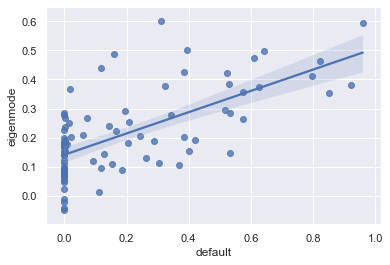

In [27]:
default_network = np.nan_to_num(fc_dk_normalized.loc["Default"].values)

# complex Laplacian eigenmodes:
brain.decompose_complex_laplacian(
    alpha=parameters.loc["Default", "alpha"],
    k=parameters.loc["Default", "wave_number"],
    vis=False,
)

# compute the spatial correlations:
corrs = np.squeeze(np.zeros([len(brain.norm_eigenmodes), 1]))
for e in np.arange(0, len(corrs)):
    corrs[e] = pearsonr(np.squeeze(default_network), brain.norm_eigenmodes[:, e])[0]

# sort the eigenmodes:
ordered_eigenmodes = np.argsort(-np.round(corrs, 3))

# 
selected_eigs = brain.norm_eigenmodes[:, ordered_eigenmodes[0 : N]]
coef, res, _, _ = np.linalg.lstsq(selected_eigs, default_network, rcond=None)
comb = selected_eigs @ coef # dot product

df_default = pd.DataFrame(np.concatenate((default_network[:, np.newaxis], comb[:, np.newaxis]), axis = 1), columns = ['default', 'eigenmode'])
markers = {""}
axis_default = sns.regplot(data=df_default, x="default", y="eigenmode")

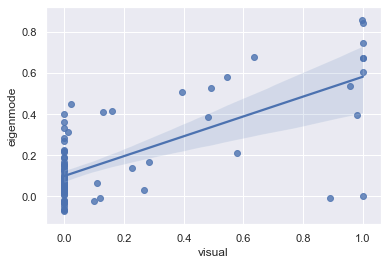

In [28]:
visual_network = np.nan_to_num(fc_dk_normalized.loc["Visual"].values)

# complex Laplacian eigenmodes:
brain.decompose_complex_laplacian(
    alpha=parameters.loc["Visual", "alpha"],
    k=parameters.loc["Visual", "wave_number"],
    vis=False,
)

# compute the spatial correlations:
corrs = np.squeeze(np.zeros([len(brain.norm_eigenmodes), 1]))
for e in np.arange(0, len(corrs)):
    corrs[e] = pearsonr(np.squeeze(visual_network), brain.norm_eigenmodes[:, e])[0]

# sort the eigenmodes:
ordered_eigenmodes = np.argsort(-np.round(corrs, 3))

# 
selected_eigs = brain.norm_eigenmodes[:, ordered_eigenmodes[0 : N]]
coef, res, _, _ = np.linalg.lstsq(selected_eigs, visual_network, rcond=None)
comb = selected_eigs @ coef # dot product

df_visual = pd.DataFrame(np.concatenate((visual_network[:, np.newaxis], comb[:, np.newaxis]), axis = 1), columns = ['visual', 'eigenmode'])
markers = {""}
axis_visual = sns.regplot(data=df_visual, x="visual", y="eigenmode")

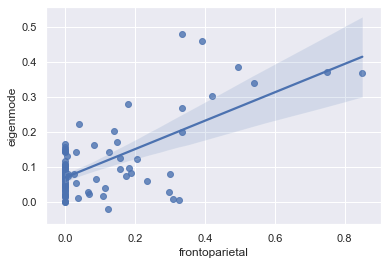

In [29]:
fronto_network = np.nan_to_num(fc_dk_normalized.loc["Frontoparietal"].values)

# complex Laplacian eigenmodes:
brain.decompose_complex_laplacian(
    alpha=parameters.loc["Frontoparietal", "alpha"],
    k=parameters.loc["Frontoparietal", "wave_number"],
    vis=False,
)

# compute the spatial correlations:
corrs = np.squeeze(np.zeros([len(brain.norm_eigenmodes), 1]))
for e in np.arange(0, len(corrs)):
    corrs[e] = pearsonr(np.squeeze(fronto_network), brain.norm_eigenmodes[:, e])[0]

# sort the eigenmodes:
ordered_eigenmodes = np.argsort(-np.round(corrs, 3))

# 
selected_eigs = brain.norm_eigenmodes[:, ordered_eigenmodes[0 : N]]
coef, res, _, _ = np.linalg.lstsq(selected_eigs, fronto_network, rcond=None)
comb = selected_eigs @ coef # dot product

df_fronto = pd.DataFrame(np.concatenate((fronto_network[:, np.newaxis], comb[:, np.newaxis]), axis = 1), columns = ['frontoparietal', 'eigenmode'])
markers = {""}
axis_fronto = sns.regplot(data=df_fronto, x="frontoparietal", y="eigenmode")

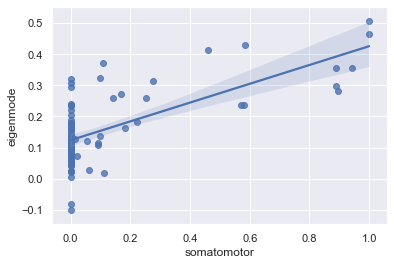

In [30]:
motor_network = np.nan_to_num(fc_dk_normalized.loc["Somatomotor"].values)

# complex Laplacian eigenmodes:
brain.decompose_complex_laplacian(
    alpha=parameters.loc["Somatomotor", "alpha"],
    k=parameters.loc["Somatomotor", "wave_number"],
    vis=False,
)

# compute the spatial correlations:
corrs = np.squeeze(np.zeros([len(brain.norm_eigenmodes), 1]))
for e in np.arange(0, len(corrs)):
    corrs[e] = pearsonr(np.squeeze(motor_network), brain.norm_eigenmodes[:, e])[0]

# sort the eigenmodes:
ordered_eigenmodes = np.argsort(-np.round(corrs, 3))

# 
selected_eigs = brain.norm_eigenmodes[:, ordered_eigenmodes[0 : N]]
coef, res, _, _ = np.linalg.lstsq(selected_eigs, motor_network, rcond=None)
comb = selected_eigs @ coef # dot product

df_motor = pd.DataFrame(np.concatenate((motor_network[:, np.newaxis], comb[:, np.newaxis]), axis = 1), columns = ['somatomotor', 'eigenmode'])
markers = {""}
axis_motor = sns.regplot(data=df_motor, x="somatomotor", y="eigenmode")

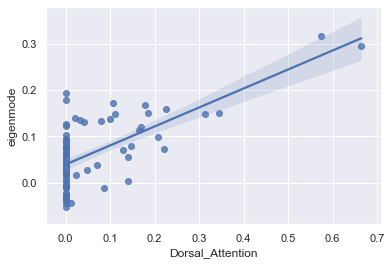

In [31]:
dorsal_network = np.nan_to_num(fc_dk_normalized.loc["Dorsal_Attention"].values)

# complex Laplacian eigenmodes:
brain.decompose_complex_laplacian(
    alpha=parameters.loc["Dorsal_Attention", "alpha"],
    k=parameters.loc["Dorsal_Attention", "wave_number"],
    vis=False,
)

# compute the spatial correlations:
corrs = np.squeeze(np.zeros([len(brain.norm_eigenmodes), 1]))
for e in np.arange(0, len(corrs)):
    corrs[e] = pearsonr(np.squeeze(dorsal_network), brain.norm_eigenmodes[:, e])[0]

# sort the eigenmodes:
ordered_eigenmodes = np.argsort(-np.round(corrs, 3))

# 
selected_eigs = brain.norm_eigenmodes[:, ordered_eigenmodes[0 : N]]
coef, res, _, _ = np.linalg.lstsq(selected_eigs, dorsal_network, rcond=None)
comb = selected_eigs @ coef # dot product

df_dorsal = pd.DataFrame(np.concatenate((dorsal_network[:, np.newaxis], comb[:, np.newaxis]), axis = 1), columns = ['Dorsal_Attention', 'eigenmode'])
markers = {""}
axis_dorsal = sns.regplot(data=df_dorsal, x="Dorsal_Attention", y="eigenmode")

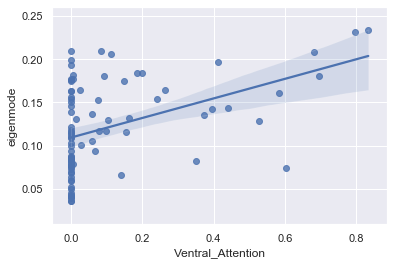

In [32]:
ventral_network = np.nan_to_num(fc_dk_normalized.loc["Ventral_Attention"].values)

# complex Laplacian eigenmodes:
brain.decompose_complex_laplacian(
    alpha=parameters.loc["Ventral_Attention", "alpha"],
    k=parameters.loc["Ventral_Attention", "wave_number"],
    vis=False,
)

# compute the spatial correlations:
corrs = np.squeeze(np.zeros([len(brain.norm_eigenmodes), 1]))
for e in np.arange(0, len(corrs)):
    corrs[e] = pearsonr(np.squeeze(ventral_network), brain.norm_eigenmodes[:, e])[0]

# sort the eigenmodes:
ordered_eigenmodes = np.argsort(-np.round(corrs, 3))

# 
selected_eigs = brain.norm_eigenmodes[:, ordered_eigenmodes[0 : N]]
coef, res, _, _ = np.linalg.lstsq(selected_eigs, ventral_network, rcond=None)
comb = selected_eigs @ coef # dot product

df_ventral = pd.DataFrame(np.concatenate((ventral_network[:, np.newaxis], comb[:, np.newaxis]), axis = 1), columns = ['Ventral_Attention', 'eigenmode'])
markers = {""}
axis_ventral = sns.regplot(data=df_ventral, x="Ventral_Attention", y="eigenmode")

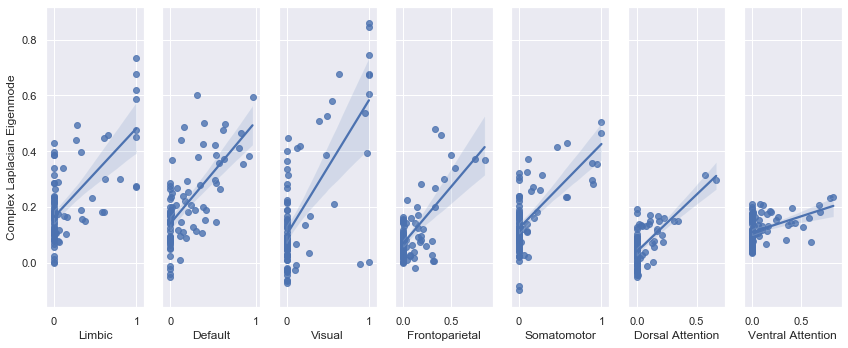

In [34]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1, 7, figsize=(12,5), sharey=True)
sns.regplot(ax=ax[0], data=df_limbic, x="limbic", y="eigenmode")
ax[0].set(xlabel='Limbic', ylabel = 'Complex Laplacian Eigenmode')
sns.regplot(ax=ax[1], data=df_default, x="default", y="eigenmode")
ax[1].set(xlabel='Default', ylabel = '')
sns.regplot(ax=ax[2], data=df_visual, x="visual", y="eigenmode")
ax[2].set(xlabel='Visual', ylabel = '')
sns.regplot(ax=ax[3], data=df_fronto, x="frontoparietal", y="eigenmode")
ax[3].set(xlabel='Frontoparietal', ylabel = '')
sns.regplot(ax=ax[4], data=df_motor, x="somatomotor", y="eigenmode")
ax[4].set(xlabel='Somatomotor', ylabel = '')
sns.regplot(ax=ax[5], data=df_dorsal, x="Dorsal_Attention", y="eigenmode")
ax[5].set(xlabel='Dorsal Attention', ylabel = '')
sns.regplot(ax=ax[6], data=df_ventral, x="Ventral_Attention", y="eigenmode")
ax[6].set(xlabel='Ventral Attention', ylabel = '')

plt.tight_layout()
plt.savefig("../figures/supp/scatter_plot_dice.png", dpi=300, bbox_inches="tight")